# Opening the Intake Catalog

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import intake

We can load the catalog file with `intake.open_catalog()`. The catalog contains the information needed to access the data for each field in the dataset. You can get a list of the different fields in the dataset with `list()`.

In [2]:
# dset = "Darwin_v0.1_llc90"
#catalog = intake.open_catalog("catalog/"+dset + '.yml')
catalog = intake.open_catalog("Darwin_v0.1_llc90.yml")
catalog = catalog
fldnames = list(catalog)
print(fldnames)

['ALK', 'CDOM', 'C_DIN', 'C_Fe', 'C_PO4', 'C_Si', 'Chl01', 'Chl02', 'Chl03', 'Chl04', 'Chl05', 'Chl06', 'Chl07', 'Chl08', 'Chl09', 'Chl10', 'Chl11', 'Chl12', 'Chl13', 'Chl14', 'Chl15', 'Chl16', 'Chl17', 'Chl18', 'Chl19', 'Chl20', 'Chl21', 'Chl22', 'Chl23', 'Chl24', 'Chl25', 'Chl26', 'Chl27', 'Chl28', 'Chl29', 'Chl30', 'Chl31', 'Chl32', 'Chl33', 'Chl34', 'Chl35', 'DIC', 'DOC', 'DOFe', 'DOP', 'DRHODR', 'Denit', 'ETAN', 'EVELMASS', 'EVELSTAR', 'EXFwspee', 'FeT', 'GGL90Kr', 'GGL90Lmx', 'GGL90TKE', 'MXLDEPTH', 'NH4', 'NO2', 'NO3', 'NVELMASS', 'NVELSTAR', 'Nfix', 'O2', 'PAR', 'PARF', 'PHIBOT', 'PIC', 'PO4', 'POC', 'POFe', 'PON', 'POP', 'POSi', 'PP', 'Rirr001', 'Rirr002', 'Rirr003', 'Rirr004', 'Rirr005', 'Rirr006', 'Rirr007', 'Rirr008', 'Rirr009', 'Rirr010', 'Rirr011', 'Rirr012', 'Rirr013', 'SALT', 'SFLUX', 'SIarea', 'SIatmFW', 'SIatmQnt', 'SIheff', 'SIhsnow', 'S_DIN', 'S_Fe', 'S_PO4', 'S_Si', 'SiO2', 'THETA', 'WVELMASS', 'WVELSTAR', 'a001', 'a002', 'a003', 'a004', 'a005', 'a006', 'a007', 'a0

# Retrieving and Plotting Data

We'll pick a field, c01 concentration. Each entry in the catalog can be accessed like a dictionary, with the field name as the key. Then we can get some basic information and metadata about this field with the `describe()` function.

In [3]:
fldname = "c01" # c01 concentration
catalog_entry = catalog[fldname]

catalog_entry.describe()

{'name': 'c01',
 'container': 'xarray',
 'plugin': ['opendap'],
 'driver': ['opendap'],
 'description': '',
 'direct_access': 'forbid',
 'user_parameters': [],
 'metadata': {'Conventions': 'CF-1.6',
  'DODS_EXTRA.Unlimited_Dimension': 'tim',
  '_FillValue': nan,
  'category': 'PlanktonBiomass',
  'coords': ('lon_c', 'dep_c', 'tim', 'lat_c'),
  'data_vars': {'c01': ['lon_c', 'dep_c', 'tim', 'lat_c'],
   'climatology_bounds': ['tim']},
  'date': '05-Feb-2020',
  'description': 'c01 -- Source: Gael Forget; version: alpha.',
  'dims': {'dep_c': 50, 'lat_c': 360, 'lon_c': 720, 'tcb': 2, 'tim': 12},
  'itile': 1.0,
  'long_name': 'c01 concentration',
  'missing_value': nan,
  'ntile': 1.0,
  'units': 'mmol C/'},
 'args': {'urlpath': 'http://engaging-opendap.mit.edu:8080/thredds/dodsC/nese/Darwin_v0.1_llc90/PlanktonBiomass/c01.0001.nc'}}

Once we load the catalog we can use the `read_chunked()` function on a catalog entry to read in a particular field. At this point we have an xarray `DataArray` object.

Then you can create variables that point to the data on OpenDap. This does not download data at this point. Data is only downloaded when you specify a "slice".

In [5]:
dataset

<xarray.Dataset>
Dimensions:             (dep_c: 50, lat_c: 360, lon_c: 720, tcb: 2, tim: 12)
Coordinates:
  * lon_c               (lon_c) float64 -179.8 -179.2 -178.8 ... 179.2 179.8
  * dep_c               (dep_c) float64 5.0 15.0 25.0 ... 5.461e+03 5.906e+03
  * tim                 (tim) datetime64[ns] 1992-01-15 ... 1992-12-15
  * lat_c               (lat_c) float64 -89.75 -89.25 -88.75 ... 89.25 89.75
Dimensions without coordinates: tcb
Data variables:
    c01                 (tim, dep_c, lat_c, lon_c) float32 ...
    climatology_bounds  (tim, tcb) datetime64[ns] ...
Attributes:
    date:                            05-Feb-2020
    Conventions:                     CF-1.6
    description:                     c01 -- Source: Gael Forget; version: alpha.
    _FillValue:                      nan
    missing_value:                   nan
    itile:                           1.0
    ntile:                           1.0
    DODS_EXTRA.Unlimited_Dimension:  tim

In [7]:
# Access the file
dataset = catalog_entry.read_chunked()

# Dimensions and Variable
time = dataset["tim"]
depth = dataset["dep_c"]
lat = dataset["lat_c"]
lon = dataset["lon_c"]
TRAC21 = dataset["c01"]

# See what this looks like
TRAC21

<xarray.DataArray 'c01' (tim: 12, dep_c: 50, lat_c: 360, lon_c: 720)>
[155520000 values with dtype=float32]
Coordinates:
  * lon_c    (lon_c) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * dep_c    (dep_c) float64 5.0 15.0 25.0 ... 5.039e+03 5.461e+03 5.906e+03
  * tim      (tim) datetime64[ns] 1992-01-15 1992-02-15 ... 1992-12-15
  * lat_c    (lat_c) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Attributes:
    coordinates:  lon lat dep tim
    long_name:    c01 concentration
    units:        mmol C/
    _ChunkSizes:  [1, 17, 120, 240]

In [18]:
TRAC21.long_name

'c01 concentration'

We can look at the attributes of a variable and get the individual attributes of a variable. We can also find out how many elements a variable has and its shape.

In [19]:
# Attributes of variables
print("Attributes of c01: " + str(TRAC21.attrs))

# Get a particular attribute
print('\n' + "Units of depth: " + depth.attrs["units"] + '\n')
# or depth.units also works

# Inspect size and shape
print("c01 has " + str(TRAC21.size) + " elements and a shape of " + str(TRAC21.shape))

Attributes of c01: {'long_name': 'c01 concentration', 'units': 'mmol C/m^3', '_ChunkSizes': [1, 9, 216, 432]}

Units of depth: m

c01 has 312478560000 elements and a shape of (2679, 50, 1080, 2160)


When you request a slice of data it will be downloaded. Let's look at the surface of the 500th time step.

In [20]:
t = 500; d = 0;
TRAC21_data = TRAC21[0,d,:,:].data

TRAC21_data

array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [3.6131708e-14, 3.6131491e-14, 3.6131173e-14, ..., 3.6762070e-14,
        3.6762365e-14, 3.6762541e-14],
       [3.0018339e-14, 3.0018143e-14, 3.0017926e-14, ..., 3.0407094e-14,
        3.0407327e-14, 3.0407490e-14],
       [2.4602545e-14, 2.4602306e-14, 2.4602157e-14, ..., 2.4408208e-14,
        2.4408372e-14, 2.4408594e-14]], dtype=float32)

Let's plot some things!

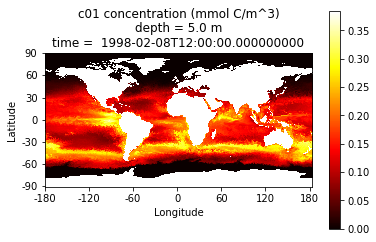

In [21]:
lat_ticks = np.arange(90, -91, step=-30)
lon_ticks = np.arange(-180, 181, step=60)
title_txt = '\ndepth = ' + str(depth[d].data) + ' ' + depth.units  + '\ntime =  '+ str(time[t].data)

a = np.flipud(TRAC21_data.reshape(TRAC21_data.shape[0],TRAC21_data.shape[1]))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(0,TRAC21_data.shape[1],356),lon_ticks)
plt.yticks(np.arange(0,TRAC21_data.shape[0],179),lat_ticks)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(TRAC21.long_name +' (' + TRAC21.units + ')' + title_txt)
plt.show()

# Working with Data

To show how to work with the data, we'll show how to get the total phytoplankton concentration for a particular time and depth. Note this section takes a few minutes to run.

In [ ]:
flds = ["TRAC"+str(n) for n in range(21,72)]
t = 500; d = 0;
import time as tm

In [ ]:
start = tm.time()
dset = "darwin_v0.2_cs510"
f = "TRAC21" # c01 concentration
dataset = catalog[f].read_chunked()
thresh = .0000001

time = dataset["time"]
depth = dataset["dep_c"]

total_phyto = dataset[f][t,d,:,:].data
total_phyto[total_phyto == -9.9999998e+33] = np.nan
for f in flds[1:-1]:
    dataset = catalog[f].read_chunked()
    fld = dataset[f][t,d,:,:].data
    #fld[fld < thresh] = 0
    total_phyto = total_phyto + fld

end = tm.time()
print ("Time elapsed:", end - start)

In [ ]:
lat_ticks = np.arange(90, -91, step=-30)
lon_ticks = np.arange(-180, 181, step=60)
title_txt = '\ndepth = ' + str(depth[d].data) + ' ' + depth.units  + '\ntime =  '+ str(time[t].data)

a = np.flipud(total_phyto.reshape(total_phyto.shape[0],total_phyto.shape[1]))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(0,total_phyto.shape[1],356),lon_ticks)
plt.yticks(np.arange(0,total_phyto.shape[0],179),lat_ticks)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Total Phytoplankton (' + TRAC21.units + ')' + title_txt)
plt.show()